# Analysis of Paleo-present Climate Data
***

## Background
Paleoclimatology is the study of the climate history of earth [1]. This science allows for a better understanding of the climate of Earth in the past and how it relates to present and future climates on the planet. Earths climate past cannot be found in modern records. Therefore, scientists must gather data preserved in nature over the millennia in paleological remains referred to as proxy records [1]. An example of a type of proxy data is when scientists drill into ice sheets and extract ice cores to analyse deposits trapped within the ice, such as pollen and gas [1]. This gives insights into the atmospheric and climatic conditions that existed when particular layers of the sheet formed. These studies have shown that the climate of Earth is always changing. Research revealed that there have been several ice ages as well as several periods of global warming [1]. An ice age is a period of colder global temperatures and recurring glacial expansion capable of lasting hundreds of millions of years [2]. Paleoclimatology has shown that other enviromental factors such as continental drift, greenhouses gases in the atmosphere, solar energy, and the variation in Earth’s orbit have all affected the climate of Earth over time. This type of science is vital to our understanding of climate on Earth. Models can be developed to help predict how increased carbon dioxide levels and other changes may impact the climate of Earth in years to come. 

## Data Collection and Loading
### CO2 Data
The CO2 data being analysed is a composite dataset derived from Antartic ice cores. The dataset spans over a timeframe of 800,000 years before the present (yrBP) to the year 2001, where 1950 is the present date. This composite, presented by Bereiter et al. in 2014, revises the earlier Lüthi et al. (2008) version. The  atmospheric CO2 concentrations is measured in parts per million by volume (ppmv) at various points in time. The age unit is measured in years before present.  

In [1]:
# Import necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load CO2 data.
df = pd.read_excel('data/new_atmospheric_CO2.xls', sheet_name='CO2 Composite', skiprows=range(14))

In [3]:
# Remove extra spaces from column names.
df.columns = df.columns.str.strip()

In [4]:
# Extract relevant columns.
co2_data = df[['Gasage (yr BP)', 'CO2 (ppmv)']]

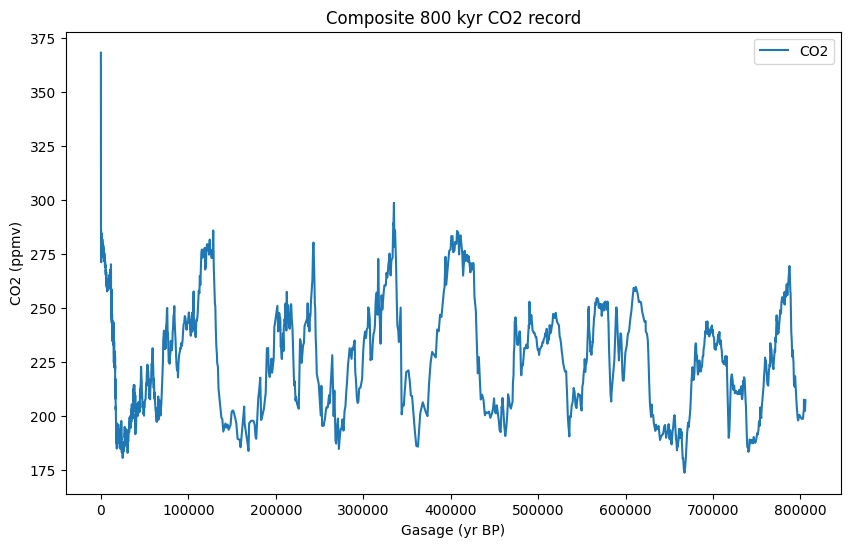

In [5]:
# Plot Composite 800 kyr CO2 record.
plt.figure(figsize=(10, 6))
plt.plot(co2_data['Gasage (yr BP)'], co2_data['CO2 (ppmv)'], label='CO2')
plt.xlabel('Gasage (yr BP)')
plt.ylabel('CO2 (ppmv)')
plt.title('Composite 800 kyr CO2 record')
plt.legend()
plt.show()


### Mauna Loa Data
The Mauna Loa data has the the latest anthropogenic data. Since 1958, the atmospheric carbon dioxide (CO2) concentration measurements were collected at the Mauna Loa Observatory in Hawaii. The observatory is in prime location to sample the Earths air. It is situated on the side of Mauna Loa, the world’s largest active volcano. The observatory is approximately 3,400 meters above sea level and remains a long distance away from significant pollution sources [4]. This means the air is relatively clean. The Mauna Loa Observatory allows scientists to understand the ongoing increase in greenhouse gas concentrations. The measurements are essential for assessing  the impact of human-induced climate change on the Earth's atmosphere. National Oceanic and Atmospheric Administration (NOAA) maintained the dataset. 

The Mauna Loa data and the historical Antarctic ice core records must be merged to allow for a comprehensive analysis of the long-term trends in atmospheric CO2 concentrations. In order to merge the datasets, a few adjustments had to be made to the Mauna Loa data. This was to ensure  compatibility between the two datasets. Specifically, the age unit was aligned by calculating the *'Gasage (yr BP)'* column to match the reference year of 1950, facilitating a seamless integration of the two datasets. Additionally, the *mean* column in the Mauna Loa data was renamed to *'CO2 (ppmv)'* for consistency with the Antarctic ice core data.

In [6]:
# Load Mauna Loa data [3].
# https://www.geeksforgeeks.org/how-to-skip-rows-while-reading-csv-file-using-pandas/
mauna_loa_data = pd.read_csv('data/mlo_data.csv',
                             skiprows = [i for i in range(1, 44)])

In [7]:
# Adjustments of Mauna Loa data required to merge datasets.
# Age unit adjustment.
reference_year = 1950
mauna_loa_data['Gasage (yr BP)'] = reference_year - mauna_loa_data['year']

# Convert 'Gasage (yr BP)' to float in the dataframe
mauna_loa_data['Gasage (yr BP)'] = mauna_loa_data['Gasage (yr BP)'].astype(float)

# Rename column to match CO2 dataset.
# https://stackoverflow.com/questions/46066685/rename-the-column-inside-csv-file
mauna_loa_data = mauna_loa_data.rename(columns=({'mean':'CO2 (ppmv)'}))

# Extract relevant columns.
mlo_data = mauna_loa_data[['Gasage (yr BP)', 'CO2 (ppmv)']]

### Merging Data

In [8]:
# Merge CO2 data and Mauna Loa data.
merged_data = pd.concat([mauna_loa_data, co2_data[['Gasage (yr BP)', 'CO2 (ppmv)']]])

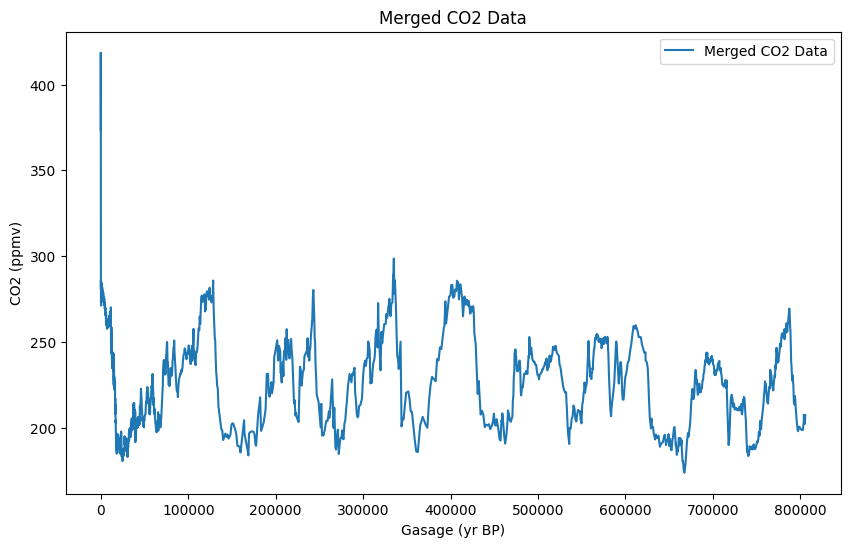

In [10]:
# Plot the merged data.
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Gasage (yr BP)'], merged_data['CO2 (ppmv)'], label='Merged CO2 Data')
plt.xlabel('Gasage (yr BP)')
plt.ylabel('CO2 (ppmv)')
plt.title('Merged CO2 Data')
plt.legend()
plt.show()

## Data Processing

## Data Analysis
### CO2 vs Temperature Anomaly Analysis

### Additional Feature Analysis

### Irish Context Analysis

## Data Export

## Temperature Anomaly Prediction

## Conclusion

## References
[1] *Paleoclimatology*, *National Geographic Society*, https://education.nationalgeographic.org/resource/paleoclimatology-RL/
<br>
[2] *Ice Age*, *HISTORY.COM EDITORS*, https://www.history.com/topics/pre-history/ice-age
<br>
[3] *Global Monitoring Laboratory*, *Dr. Pieter Tans* and *Dr. Ralph Keeling*, https://gml.noaa.gov/ccgg/trends/data.html
<br>
[4] *Mauna Loa Observatory*, *National Geographic Society*, https://education.nationalgeographic.org/resource/mauna-loa-observatory/

***
# End